In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import joblib

In [2]:
# Step 2: Load dataset
data = pd.read_csv("/content/adult 3.csv")
print("Initial shape:", data.shape)

Initial shape: (48842, 15)


In [3]:
# Step 3: Handle missing values (replace '?' with 'Others')
data['workclass'].replace('?', 'Others', inplace=True)
data['occupation'].replace('?', 'Others', inplace=True)

/tmp/ipython-input-3-4106213938.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].replace('?', 'Others', inplace=True)
/tmp/ipython-input-3-4106213938.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [4]:
# Step 4: Drop rare or irrelevant categories
data = data[~data['workclass'].isin(['Without-pay', 'Never-worked'])]


In [5]:
# Step 5: Display category counts (optional)
print("Workclass counts:\n", data['workclass'].value_counts())
print("Occupation counts:\n", data['occupation'].value_counts())
print("Relationship counts:\n", data['relationship'].value_counts())
print("Gender counts:\n", data['gender'].value_counts())

Workclass counts:
 workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64
Occupation counts:
 occupation
Prof-specialty       6172
Craft-repair         6111
Exec-managerial      6085
Adm-clerical         5608
Sales                5503
Other-service        4921
Machine-op-inspct    3020
Others               2799
Transport-moving     2354
Handlers-cleaners    2070
Farming-fishing      1482
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64
Relationship counts:
 relationship
Husband           19708
Not-in-family     12582
Own-child          7566
Unmarried          5123
Wife               2327
Other-relative     1505
Name: count, dtype: int64
Gender counts:
 gender
Male      32629
Female    16182
Name: count, dtype: int64


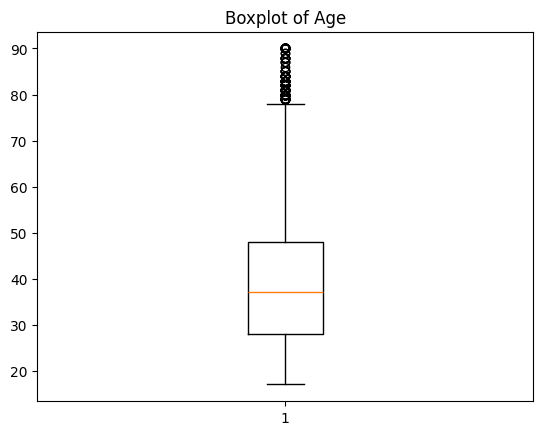

In [6]:
# Step 6: Outlier detection and handling using boxplots (optional visualization)
plt.boxplot(data['age'])
plt.title("Boxplot of Age")
plt.show()

In [7]:
# Remove age outliers
data = data[(data['age'] >= 17) & (data['age'] <= 75)]

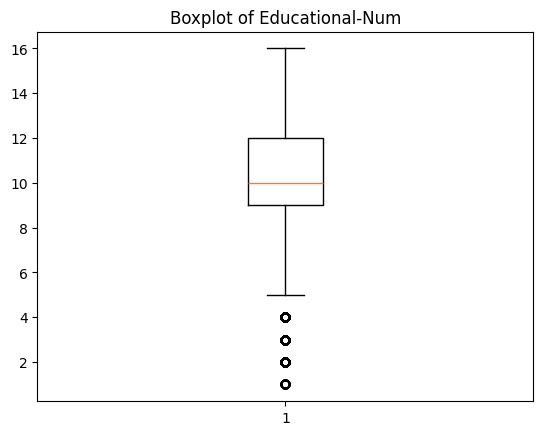

In [8]:
# Educational-num outlier removal
plt.boxplot(data['educational-num'])
plt.title("Boxplot of Educational-Num")
plt.show()

In [9]:
data = data[(data['educational-num'] >= 5) & (data['educational-num'] <= 16)]

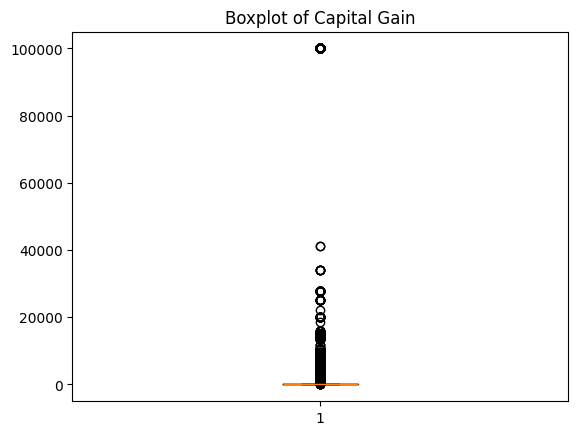

In [10]:
# Capital-gain and hours-per-week (just visualization)
plt.boxplot(data['capital-gain'])
plt.title("Boxplot of Capital Gain")
plt.show()

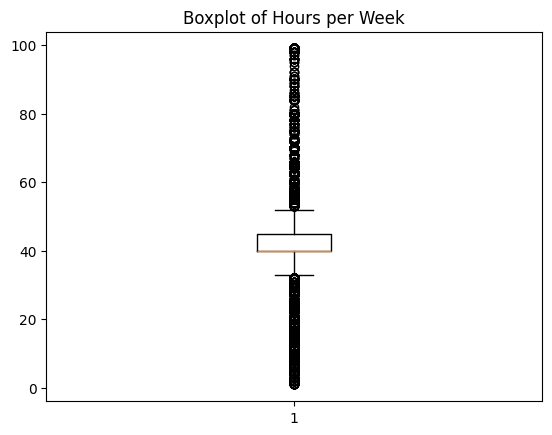

In [11]:
plt.boxplot(data['hours-per-week'])
plt.title("Boxplot of Hours per Week")
plt.show()

In [12]:
# Step 7: Drop 'education' column (because 'educational-num' is numerical version)
data.drop(columns=['education'], inplace=True)

In [13]:
# Step 8: Label Encoding of categorical variables
encoder = LabelEncoder()
categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

In [14]:
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

In [15]:
# Step 9: Define features and target
X = data.drop(columns=['income'])
y = data['income']

In [16]:
# ✅ Save feature names for later use in Streamlit
joblib.dump(X.columns.tolist(), "model_features.pkl")

['model_features.pkl']

In [17]:
# Step 10: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Step 11: Define models to compare
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "GradientBoosting": GradientBoostingClassifier()
}

# Step 12: Train and evaluate models using pipeline
results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


LogisticRegression Accuracy: 0.8149
              precision    recall  f1-score   support

       <=50K       0.84      0.93      0.88      7010
        >50K       0.69      0.46      0.55      2334

    accuracy                           0.81      9344
   macro avg       0.77      0.70      0.72      9344
weighted avg       0.80      0.81      0.80      9344


RandomForest Accuracy: 0.8510
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7010
        >50K       0.74      0.62      0.68      2334

    accuracy                           0.85      9344
   macro avg       0.81      0.77      0.79      9344
weighted avg       0.85      0.85      0.85      9344


KNN Accuracy: 0.8245
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      7010
        >50K       0.67      0.60      0.63      2334

    accuracy                           0.82      9344
   macro avg       0.77      0.75     

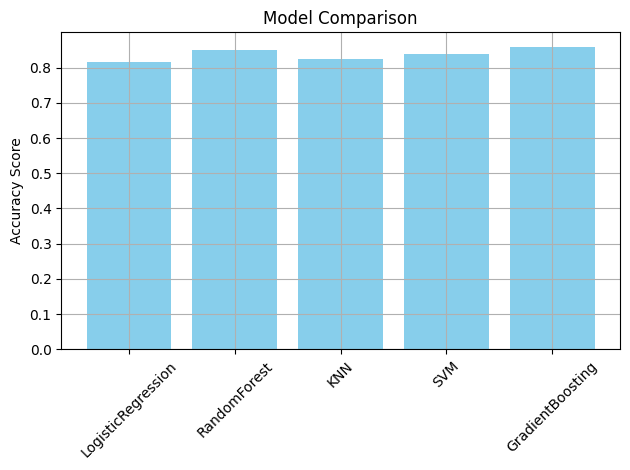

In [19]:
# Step 13: Visualize model comparison
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
# Step 14: Save the best-performing model
best_model_name = max(results, key=results.get)
final_model = models[best_model_name]
final_model.fit(X_train, y_train)
joblib.dump(final_model, "best_model.pkl")

print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")
print("✅ Model saved as 'best_model.pkl'")


✅ Best model: GradientBoosting with accuracy 0.8571
✅ Model saved as 'best_model.pkl'


In [21]:
# Step 15: Predict on first 5 test samples using the saved pipeline
loaded_pipeline = joblib.load("best_model.pkl")

# Predict directly using pipeline (includes scaler)
predictions = loaded_pipeline.predict(X_test[:10])

# Display predictions
print("\n🧠 Predicted Salary Classes for first 10 test samples:")
for i, label in enumerate(predictions, 1):
    print(f"Sample {i}: {label}")



🧠 Predicted Salary Classes for first 10 test samples:
Sample 1: <=50K
Sample 2: <=50K
Sample 3: <=50K
Sample 4: <=50K
Sample 5: <=50K
Sample 6: >50K
Sample 7: >50K
Sample 8: <=50K
Sample 9: <=50K
Sample 10: <=50K


In [22]:
!pip install -q streamlit pyngrok


In [23]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load trained model and feature names
model = joblib.load("best_model.pkl")
feature_names = joblib.load("model_features.pkl")

# Page configuration
st.set_page_config(page_title="💼 Employee Salary Predictor", layout="centered")
st.title("💼 Employee Salary Prediction App")

# Create input fields for each feature
st.header("📝 Enter Employee Details:")

# Dictionary to collect user inputs
user_input = {}

# Define input options for categorical fields
workclass_options = ['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Others']
marital_status_options = ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']
occupation_options = ['Adm-clerical', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners',
                      'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty',
                      'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving', 'Others']
relationship_options = ['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife']
race_options = ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']
gender_options = ['Female', 'Male']
native_country_options = ['United-States', 'Mexico', 'Philippines', 'Germany', 'Canada', 'Others']

# Input widgets
user_input['age'] = st.number_input("Age", min_value=17, max_value=90, value=30)
user_input['workclass'] = st.selectbox("Workclass", workclass_options)
user_input['fnlwgt'] = st.number_input("Final Weight (fnlwgt)", min_value=10000, max_value=1000000, value=150000)
user_input['marital-status'] = st.selectbox("Marital Status", marital_status_options)
user_input['occupation'] = st.selectbox("Occupation", occupation_options)
user_input['relationship'] = st.selectbox("Relationship", relationship_options)
user_input['race'] = st.selectbox("Race", race_options)
user_input['gender'] = st.selectbox("Gender", gender_options)
user_input['capital-gain'] = st.number_input("Capital Gain", min_value=0, max_value=100000, value=0)
user_input['capital-loss'] = st.number_input("Capital Loss", min_value=0, max_value=5000, value=0)
user_input['hours-per-week'] = st.slider("Hours per Week", min_value=1, max_value=99, value=40)
user_input['native-country'] = st.selectbox("Native Country", native_country_options)
user_input['educational-num'] = st.slider("Educational Number", min_value=1, max_value=20, value=10)

# When user clicks predict
if st.button("🔮 Predict Salary Class"):
    input_df = pd.DataFrame([user_input])

    # Encode categorical variables (same encoding order as training)
    label_enc_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
    for col in label_enc_cols:
        input_df[col] = pd.factorize(input_df[col])[0]  # Fast encoding for consistency

    # Reorder columns to match training
    input_df = input_df.reindex(columns=feature_names)

    # Predict
    prediction = model.predict(input_df)[0]

    # Show result
    st.success(f"🧾 Predicted Salary Class: **{prediction}**")



Overwriting app.py


In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("30DubTquMZMtCs8dnpQgxl08eiw_5XfvdsxzDRX691LWZT7fD")  # Replace with your actual token
public_url = ngrok.connect(8501)
print(public_url)
!streamlit run app.py &

NgrokTunnel: "https://fce6a2214b69.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.132.118.107:8501

